#### 0) Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving trains.csv to trains.csv
Saving validation.csv to validation (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
loan_df = pd.read_csv("trains.csv")

### 1) Dataset Understanding

In [ ]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002051,Male,Yes,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban,Y
1,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
2,LP002877,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural,Y
3,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
4,LP002743,Female,No,0,Graduate,No,2138,0.0,99.0,360.0,0.0,Semiurban,N


In [ ]:
loan_df.dtypes

Row Labels               object
Count of Loan_Status    float64
Unnamed: 2              float64
Unnamed: 3              float64
Unnamed: 4              float64
Unnamed: 5              float64
Unnamed: 6              float64
Unnamed: 7              float64
Unnamed: 8               object
Unnamed: 9               object
Unnamed: 10              object
Unnamed: 11              object
Unnamed: 12              object
dtype: object

In [ ]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,474.000000,480.000000,447.000000
mean,5450.040733,1672.187210,146.689873,341.950000,0.850112
std,6383.021473,3157.016665,82.914809,65.909389,0.357362
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2891.500000,0.000000,100.000000,360.000000,1.000000
50%,3813.000000,1213.000000,128.000000,360.000000,1.000000
75%,5929.000000,2253.500000,169.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
loan_df.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,491,480,488,478,491,463,491,491
unique,491,2,2,4,2,2,3,2
top,LP002051,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,383,316,280,393,391,178,338


### 2) Handling Missing Values

In [ ]:
loan_df.isnull().sum()

Row Labels              23
Count of Loan_Status    18
Unnamed: 2              26
Unnamed: 3              28
Unnamed: 4              28
Unnamed: 5              28
Unnamed: 6              28
Unnamed: 7              28
Unnamed: 8              22
Unnamed: 9              24
Unnamed: 10             22
Unnamed: 11             25
Unnamed: 12             27
dtype: int64

> For all categorical variables, the number of missing values in any given column is less than 10% of the total observations (credit history at ~8% of 491 observations) - Hence, we will use mode (most frequently appearing value) to add these missing values

In [ ]:
# Using MODE for categorical columns
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace=True)

For all continous variable, we use mean

In [ ]:
# Using mean value for continuous columns
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(), inplace=True)
loan_df['ApplicantIncome'].fillna(loan_df['ApplicantIncome'].mean(), inplace=True)
loan_df['CoapplicantIncome'].fillna(loan_df['CoapplicantIncome'].mean(), inplace=True)

In [ ]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 3) Variable Analysis - Continuous and Categorical

#### 3.1) Categorical variable analysis
- There are 8 categorical variables. Goal is to understand each one's relationship with loan approval

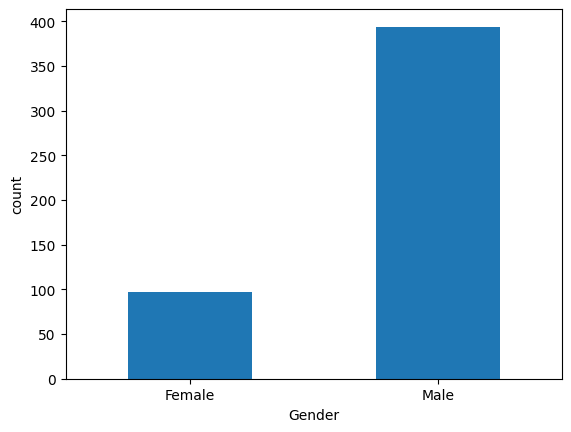

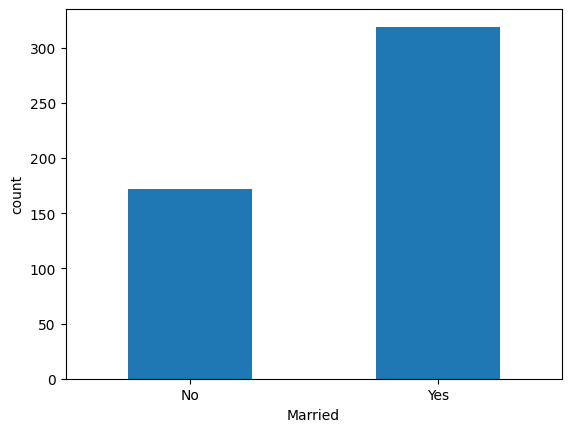

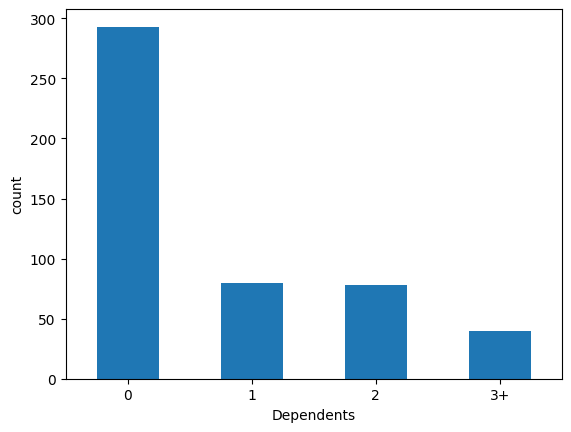

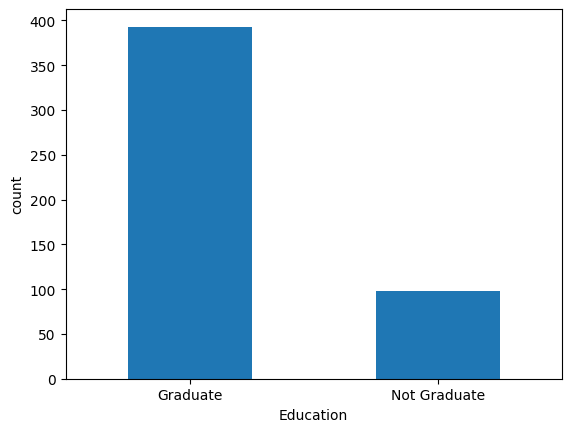

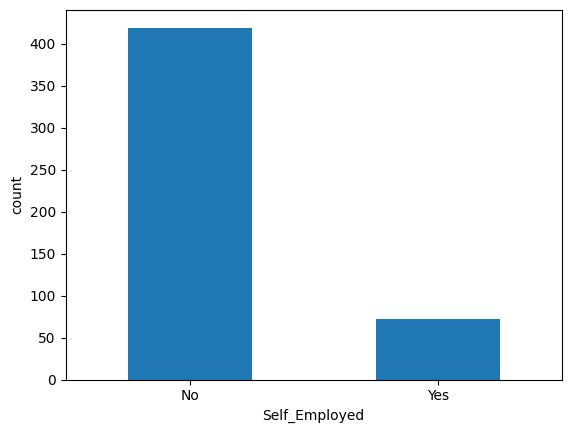

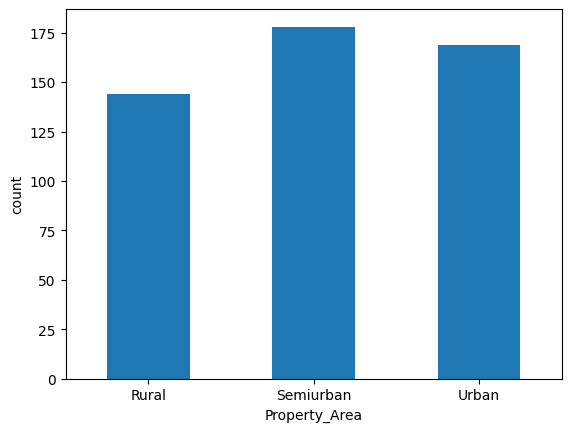

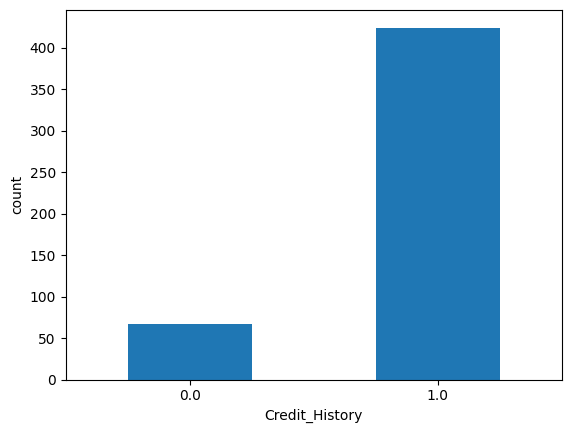

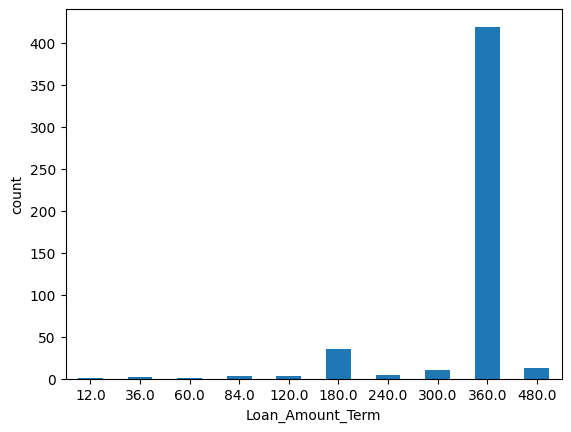

In [ ]:
#Univariate analysis
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
for col in cat_cols:
    loan_df[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

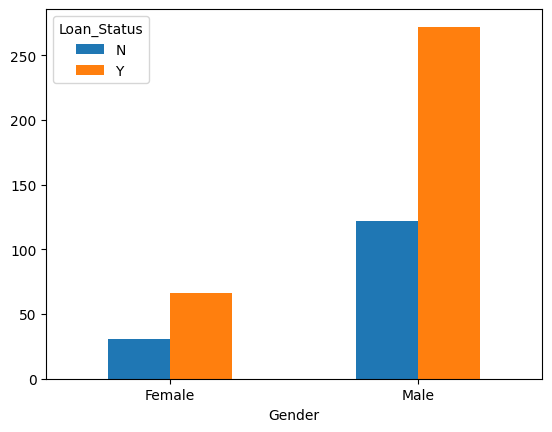

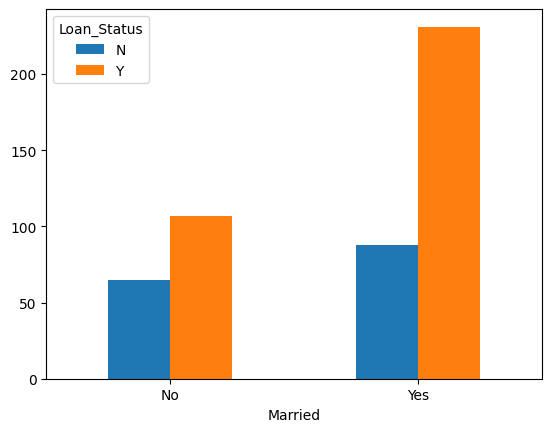

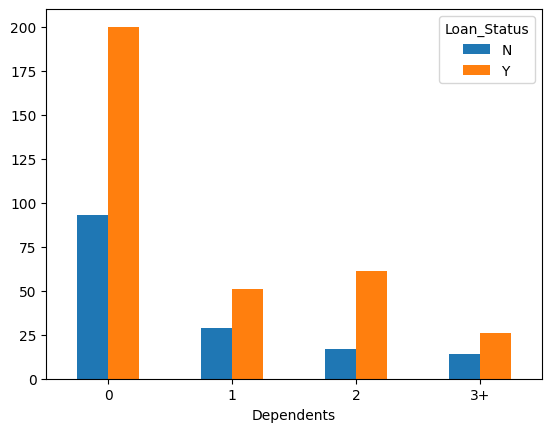

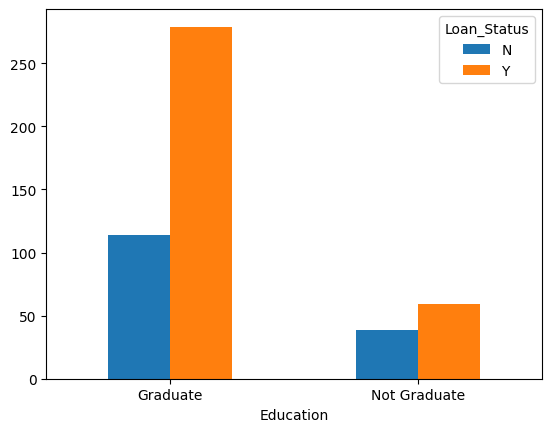

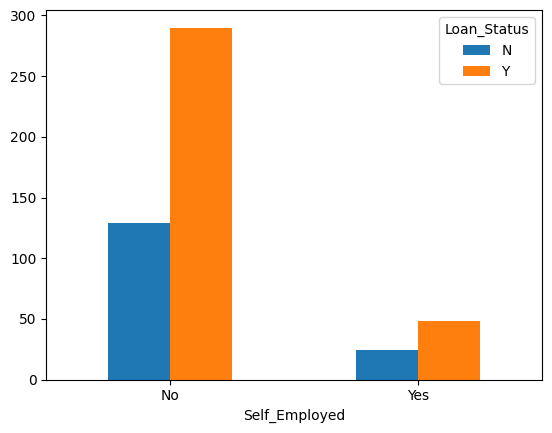

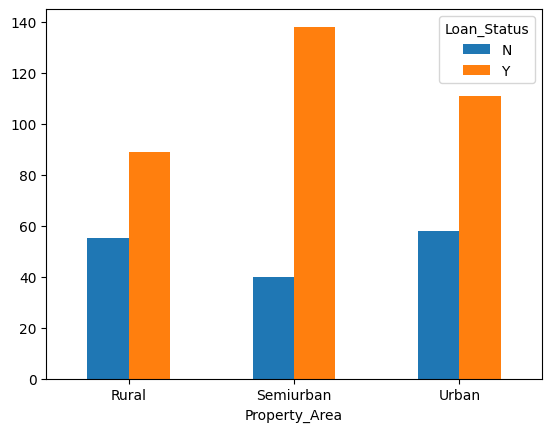

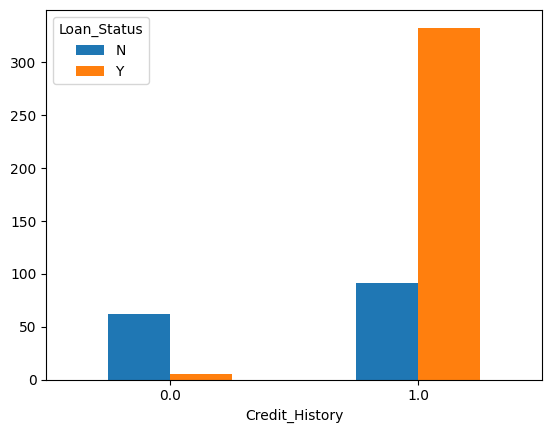

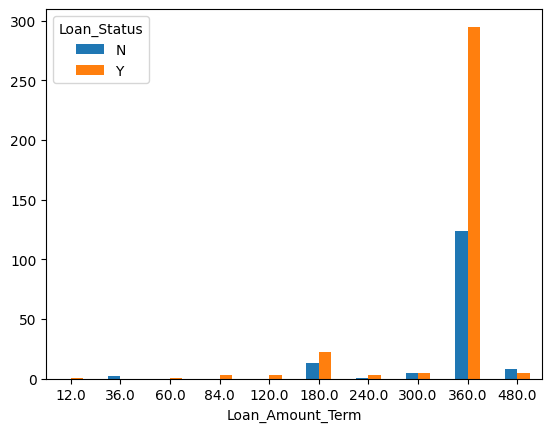

In [ ]:
# Bi-Variate Categorical variable visualization
for cols in cat_cols:
  CrosstabResult=pd.crosstab(index=loan_df[cols],columns=loan_df['Loan_Status'])
  CrosstabResult.plot.bar(rot=0)

 Visual Observations -
- Very strong relationship between credit history and loan given. Looks like no loans have been approved for those without any credit history
- Relationship seen with education = graduate and people who aren't self employed have looks like have higher approval rate

In [ ]:
for cols in cat_cols:
  CrosstabResult=pd.crosstab(index=loan_df[cols],columns=loan_df['Loan_Status'])
  ChiSqResult = chi2_contingency(CrosstabResult)
  print(cols, '- loan_status, p-value : ',ChiSqResult[1])


Gender - loan_status, p-value :  0.9465509677197104
Married - loan_status, p-value :  0.025949088314561823
Dependents - loan_status, p-value :  0.21440453858654146
Education - loan_status, p-value :  0.05224578301545345
Self_Employed - loan_status, p-value :  0.769428230557286
Property_Area - loan_status, p-value :  0.005594634074622978
Credit_History - loan_status, p-value :  9.222983457056097e-31
Loan_Amount_Term - loan_status, p-value :  0.05860020086818494


Observations -
*   Considering H0 as the null hypothesis - meaning there is no significant relationship between the independent and dependent variable, we can see that   *Married*, *Property_Area*, *Credit_History* have p < 0.05 showing a strong relationship with loan_given and influence it
> Additional variables to evaluate - Education and Loan_Amount_Term



#### 3.2) Continous variable analysis -
There are three continous variables -ApplicantIncome, CoapplicantIncome,
 LoanAmount

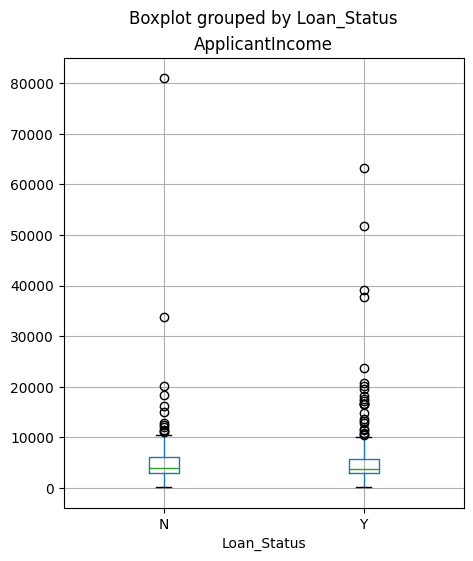

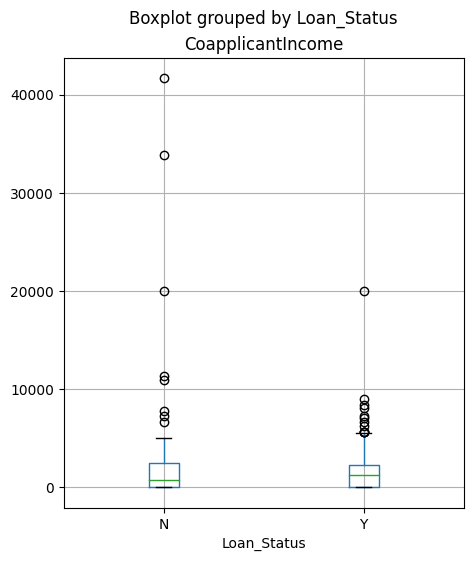

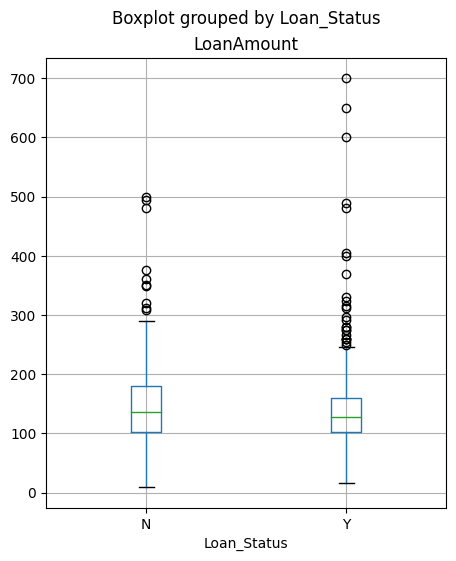

In [ ]:
numeric_cols =['ApplicantIncome','CoapplicantIncome','LoanAmount']
for cols in numeric_cols :
  loan_df.boxplot(column= cols, by='Loan_Status', figsize=(5,6))

In [ ]:
from scipy.stats import f_oneway
for cols in numeric_cols:
  CategoryGroupLists=loan_df.groupby('Loan_Status')[cols].apply(list)
  AnovaResults = f_oneway(*CategoryGroupLists)
  print("p-value for ", cols, " : ", AnovaResults[1])

p-value for  ApplicantIncome  :  0.6891586562616032
p-value for  CoapplicantIncome  :  0.07667036495598768
p-value for  LoanAmount  :  nan


The applicant income, co applicant income don't exhibit strong relations with loan approval.
Slight relation possible with Loan Amount - need to check

### 4) Feature Selection and converting categorical variables to binary representations
*   Married
*   Property_Area
*   Credit_History
*   Education

Converting categorical variables using one-hot encoding



In [ ]:
loan_df['Credit_History'].replace({1:'Yes', 0:'No'}, inplace=True)
feature_df = loan_df[['Married', 'Property_Area', 'Credit_History', 'Education']]
feature_df_ohe = pd.get_dummies(feature_df)
feature_df_ohe['Loan_Status'] = loan_df['Loan_Status']

In [ ]:
feature_df_ohe

,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_No,Credit_History_Yes,Education_Graduate,Education_Not Graduate,Loan_Status
0,0,1,0,1,0,0,1,1,0,Y
1,1,0,1,0,0,0,1,1,0,Y
2,0,1,1,0,0,0,1,1,0,Y
3,0,1,0,1,0,0,1,1,0,N
4,1,0,0,1,0,1,0,1,0,N
...,...,...,...,...,...,...,...,...,...,...
486,1,0,0,0,1,0,1,1,0,Y
487,0,1,0,1,0,0,1,1,0,Y
488,1,0,0,1,0,0,1,1,0,Y
489,1,0,1,0,0,0,1,1,0,Y


### 5) Model Building and evaluation -
> Chosen - Logistic Regression

#### 5.1) Logistic Regression

In [ ]:
X=feature_df_ohe.drop('Loan_Status',1)
y=feature_df_ohe['Loan_Status'].values

<ipython-input-27-22acd743f6e9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=feature_df_ohe.drop('Loan_Status',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=feature_df_ohe.Loan_Status)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(343, 9)
(343,)
(148, 9)
(148,)


In [ ]:
clf = LogisticRegression(C=1)

In [ ]:
lr_model=clf.fit(X_train,y_train)
prediction=lr_model.predict(X_test)

In [ ]:
# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
cm = metrics.confusion_matrix(y_test, prediction)
print ("Accuracy : ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           N       0.92      0.48      0.63        46
           Y       0.81      0.98      0.88       102

    accuracy                           0.82       148
   macro avg       0.86      0.73      0.76       148
weighted avg       0.84      0.82      0.81       148

[[ 22  24]
 [  2 100]]
Accuracy :  0.8243243243243243


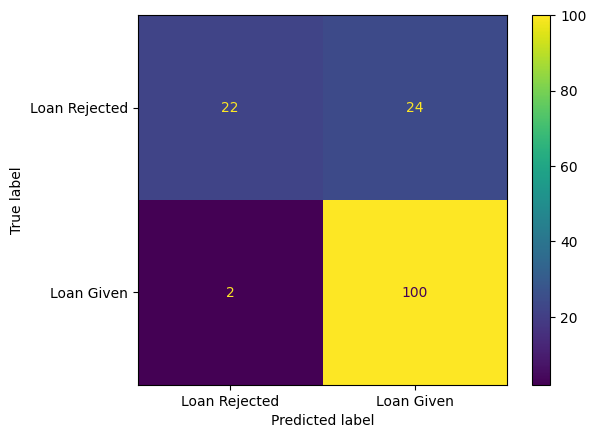

In [ ]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['Loan Rejected','Loan Given'])
cmd.plot()

In [ ]:
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('F1 Score for Test Data:', round(F1_Score,2))

F1 Score for Test Data: 0.81


In [ ]:
#Cross validation
Accuracy_Values=cross_val_score(lr_model, X , y, cv=10, scoring='f1_weighted')
print('Accuracy, 10-fold Cross Validation:\n',Accuracy_Values)
print('Average Accuracy:', round(Accuracy_Values.mean(),2))

Accuracy, 10-fold Cross Validation:
 [0.73769741 0.78770209 0.70957614 0.79694765 0.70670216 0.78770209
 0.75798012 0.815643   0.79141083 0.84894553]
Average Accuracy: 0.77


##### 5.1.1) Run it on validation set

In [ ]:
validation_df = pd.read_csv("validation.csv")

In [ ]:
# Using MODE for categorical columns
validation_df['Gender'].fillna(validation_df['Gender'].mode()[0], inplace=True)
validation_df['Married'].fillna(validation_df['Married'].mode()[0], inplace=True)
validation_df['Dependents'].fillna(validation_df['Dependents'].mode()[0], inplace=True)
validation_df['Self_Employed'].fillna(validation_df['Self_Employed'].mode()[0], inplace=True)
validation_df['Loan_Amount_Term'].fillna(validation_df['Loan_Amount_Term'].mode()[0], inplace=True)
validation_df['Credit_History'].fillna(validation_df['Credit_History'].mode()[0], inplace=True)

In [ ]:
validation_df['Credit_History'].replace({1:'Yes', 0:'No'}, inplace=True)
validation_df_ohe = validation_df[['Married', 'Property_Area', 'Credit_History', 'Education']]
validation_df_ohe = pd.get_dummies(validation_df_ohe)
validation_df_ohe

,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History_No,Credit_History_Yes,Education_Graduate,Education_Not Graduate
0,0,1,0,0,1,1,0,1,0
1,0,1,0,1,0,0,1,0,1
2,0,1,0,0,1,1,0,1,0
3,1,0,0,0,1,0,1,1,0
4,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
118,0,1,1,0,0,1,0,0,1
119,1,0,1,0,0,0,1,1,0
120,0,1,1,0,0,0,1,1,0
121,1,0,1,0,0,0,1,0,1


In [ ]:
prediction=lr_model.predict(validation_df_ohe)

In [ ]:
validation_df['Loan_Status'] = prediction

In [ ]:
from google.colab import files
validation_df.to_csv('validation_with_results.csv')
files.download('validation_with_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 5.2) Decision Trees

In [ ]:
#Decision Trees
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy on Testing Data:', round(F1_Score,2))

Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('10-fold Cross Validation:\n',Accuracy_Values)
print('Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.92      0.48      0.63        46
           Y       0.81      0.98      0.88       102

    accuracy                           0.82       148
   macro avg       0.86      0.73      0.76       148
weighted avg       0.84      0.82      0.81       148

[[ 22  24]
 [  2 100]]
Accuracy on Testing Data: 0.81
10-fold Cross Validation:
 [0.73769741 0.78770209 0.70957614 0.79694765 0.72346451 0.78770209
 0.75798012 0.815643   0.79141083 0.84894553]
Average Accuracy of the model: 0.78


#### 5.3) Random Forest

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy on Testing Data:', round(F1_Score,2))

Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('10-fold Cross Validation:\n',Accuracy_Values)
print('Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           N       0.92      0.48      0.63        46
           Y       0.81      0.98      0.88       102

    accuracy                           0.82       148
   macro avg       0.86      0.73      0.76       148
weighted avg       0.84      0.82      0.81       148

[[ 22  24]
 [  2 100]]
Accuracy on Testing Data: 0.81
10-fold Cross Validation:
 [0.73769741 0.78770209 0.70957614 0.79694765 0.72346451 0.78770209
 0.75798012 0.815643   0.79141083 0.84894553]
Average Accuracy of the model: 0.78


#### 6) Balancing dataset with sampling techniques and then trying logistic regression

In [ ]:
loan_df['Loan_Status'].value_counts()

Y    338
N    153
Name: Loan_Status, dtype: int64

##### 6.1) Smote - Synthetic minority oversampling technique

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(feature_df_ohe.drop('Loan_Status', axis=1), feature_df_ohe['Loan_Status'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [ ]:
oversampled['Loan_Status'].value_counts()

Y    338
N    338
Name: Loan_Status, dtype: int64

In [ ]:
X=oversampled.drop('Loan_Status',1)
y=oversampled['Loan_Status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(C=1)
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
print ("Accuracy : ", accuracy_score(y_test, prediction))
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy on Testing Data:', round(F1_Score,2))

Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('10-fold Cross Validation:\n',Accuracy_Values)
print('Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Accuracy :  0.6748768472906403
              precision    recall  f1-score   support

           N       0.82      0.42      0.55        98
           Y       0.63      0.91      0.74       105

    accuracy                           0.67       203
   macro avg       0.72      0.67      0.65       203
weighted avg       0.72      0.67      0.65       203

[[41 57]
 [ 9 96]]
Accuracy on Testing Data: 0.65
10-fold Cross Validation:
 [0.63864734 0.65861822 0.64583333 0.66502463 0.74051627 0.69692705
 0.60829001 0.7457285  0.59185889 0.62145618]
Average Accuracy of the model: 0.66


<ipython-input-128-ae0fe68ae930>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=oversampled.drop('Loan_Status',1)


##### 6.2) Undersampling majority class

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = feature_df_ohe[(feature_df_ohe['Loan_Status']=='Y')]
df_minority = feature_df_ohe[(feature_df_ohe['Loan_Status']=='N')]

# upsample minority class
df_majority_downsampled = resample(df_majority, replace=True,n_samples= 153,random_state=42)

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
df_downsampled.shape

(306, 10)

In [ ]:
df_downsampled['Loan_Status'].value_counts()

Y    153
N    153
Name: Loan_Status, dtype: int64

In [ ]:
X=df_downsampled.drop('Loan_Status',1)
y=df_downsampled['Loan_Status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(C=1)
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
print ("Accuracy : ", accuracy_score(y_test, prediction))
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy on Testing Data:', round(F1_Score,2))

Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('10-fold Cross Validation:\n',Accuracy_Values)
print('Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Accuracy :  0.7282608695652174
              precision    recall  f1-score   support

           N       0.80      0.56      0.66        43
           Y       0.69      0.88      0.77        49

    accuracy                           0.73        92
   macro avg       0.75      0.72      0.72        92
weighted avg       0.74      0.73      0.72        92

[[24 19]
 [ 6 43]]
Accuracy on Testing Data: 0.72
10-fold Cross Validation:
 [0.54744624 0.63517665 0.63517665 0.68637393 0.59982766 0.68637393
 0.625      0.67032967 0.73214286 0.73214286]
Average Accuracy of the model: 0.65


<ipython-input-132-8a6015d8c22b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_downsampled.drop('Loan_Status',1)
